In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
# %matplotlib widget

import os

import statsmodels.tools.eval_measures as bias
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
path = 'https://drive.google.com/uc?export=download&id=' 
URL  = 'https://drive.google.com/file/d/1057_dPk6rIZgXVku8kmZjq3m8WQNkJZb/view?usp=sharing'
df = pd.read_csv(path+URL.split('/')[-2],usecols=[0,1,2,3,4,5,6,7],names=['Date','SERIE1','SERIE2','SERIE3','SERIE4','SERIE5','SERIE6','SERIE7'],
                 dtype={'Date':str,'SERIE1':float,'SERIE2':float,'SERIE3':float,'SERIE4':float,'SERIE5':float,'SERIE6':float,'SERIE7':float}) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'],format= '%d-%m-%Y %H:%M' ) #.dt.date https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html
df = df.set_index('Date')
df_5 = df.resample('5T').mean()
df_5.head()

,SERIE1,SERIE2,SERIE3,SERIE4,SERIE5,SERIE6,SERIE7
Date,,,,,,,
2010-01-01 00:00:00,5547.831152,4353.258496,4927.916309,1355.909058,1697.601026,3396.820703,920.982605
2010-01-01 00:05:00,5535.618164,4348.893457,4916.344433,1353.716626,1699.889233,3397.829590,918.181799
2010-01-01 00:10:00,5529.010351,4331.776856,4897.709473,1346.924121,1697.138647,3424.317334,916.371033
2010-01-01 00:15:00,5514.982032,4330.051758,4879.650098,1346.241382,1705.324194,3421.112500,916.161291
2010-01-01 00:20:00,5472.567285,4314.503906,4863.172266,1334.846802,1674.401562,3409.312451,914.513721


In [3]:
df_serie4 = df_5[['SERIE4']]

In [4]:
df_serie4['index'] = range(len(df_serie4))
df_serie4.iloc[49247:75743]

C:\Users\user\AppData\Local\Temp\ipykernel_18676\1904033931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serie4['index'] = range(len(df_serie4))


,SERIE4,index
Date,,
2010-06-20 23:55:00,2828.664111,49247
2010-06-21 00:00:00,2830.813281,49248
2010-06-21 00:05:00,2827.722998,49249
2010-06-21 00:10:00,2829.968164,49250
2010-06-21 00:15:00,2830.823340,49251
...,...,...
2010-09-20 23:30:00,3040.164892,75738
2010-09-20 23:35:00,3033.962793,75739
2010-09-20 23:40:00,3024.287891,75740


In [5]:
dir = 'Figure/'
#!mkdir Figure

In [6]:
df

,SERIE1,SERIE2,SERIE3,SERIE4,SERIE5,SERIE6,SERIE7
Date,,,,,,,
2010-01-01 00:00:00,5558.661133,4369.373047,4943.601074,1357.897827,1700.190308,3399.208496,923.603027
2010-01-01 00:01:00,5552.933105,4359.655762,4932.601563,1358.277100,1697.078613,3395.637207,922.437500
2010-01-01 00:02:00,5546.214355,4352.123047,4922.840332,1357.305786,1693.631470,3393.930664,921.617676
2010-01-01 00:03:00,5543.996582,4349.669922,4920.733887,1353.400879,1698.514771,3397.180176,919.187134
2010-01-01 00:04:00,5537.350586,4335.470703,4919.804688,1352.663696,1698.589966,3398.146973,918.067688
...,...,...,...,...,...,...,...
2011-11-28 15:48:00,6880.122559,4286.315918,7158.373047,1822.334351,2312.779297,5218.218750,956.627991
2011-11-28 15:49:00,6876.536133,4254.998535,7204.719238,1825.447510,2301.016846,5191.893555,950.841797
2011-11-28 15:50:00,6892.931641,4241.349609,7184.632324,1824.813354,2315.475342,5195.858398,956.338318


In [7]:
directory = 'results/data/Season A'
#!mkdir directory

dict_df = {}
for filename in os.listdir(directory):
    print(filename)
    f = os.path.join(directory, filename)
    model_name = filename.split('.')[0]
    # print(model_name)
    if 'X' in filename or 'HW' in filename or 'Per' in filename:
        df = pd.read_csv(f, header=None)
        df.columns = ['index', 't_pred', 'y_pred']
        if 'X' in filename:
            df['index'] = range(49247, 49247 + 26520)
    else:
        df = pd.read_csv(f, header=None)
        df.columns = ['index', 't_pred', 'y_pred', 't_sel', 't_corr']
    
    df['model'] = model_name
    if df['y_pred'].dtype == 'object':
        df['y_pred'] = df['y_pred'].str.replace('[', '')
        df['y_pred'] = df['y_pred'].str.replace(']', '')
    df['y_pred'] = pd.to_numeric(df['y_pred'])
    df.set_index('index', inplace = True)
    
    dict_df.update({
        model_name : df
    })

C:\Users\user\AppData\Local\Temp\ipykernel_18676\3720582203.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykernel_18676\3720582203.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
C:\Users\user\AppData\Local\Temp\ipykernel_18676\3720582203.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykern

LogAnMA_Bagg.csv
LogAnMA_Boost.csv
LogAnMA_euc.csv
LogAnMA_Lasso.csv
LogAnMA_OLS.csv


C:\Users\user\AppData\Local\Temp\ipykernel_18676\3720582203.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykernel_18676\3720582203.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
C:\Users\user\AppData\Local\Temp\ipykernel_18676\3720582203.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykern

LogAnMA_PCR.csv
LogAnMA_PLS.csv
LogAnMA_RF.csv
LogAnMA_Ridge.csv
LogAn_Bagg.csv


C:\Users\user\AppData\Local\Temp\ipykernel_18676\3720582203.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykernel_18676\3720582203.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
C:\Users\user\AppData\Local\Temp\ipykernel_18676\3720582203.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykern

LogAn_Boost.csv
LogAn_euc.csv
LogAn_Lasso.csv
LogAn_OLS.csv
LogAn_PCR.csv
LogAn_PLS.csv
LogAn_RF.csv
LogAn_Ridge.csv
LogHWA.csv
LogHWM.csv
LogXAnMA_Bagg.csv
LogXAnMA_Boost.csv
LogXAnMA_euc.csv
LogXAnMA_Lasso.csv
LogXAnMA_OLS.csv
LogXAnMA_PCR.csv
LogXAnMA_PLS.csv
LogXAnMA_RF.csv
LogXAnMA_Ridge.csv
LogXAn_Bagg.csv
LogXAn_Boost.csv
LogXAn_euc.csv
LogXAn_Lasso.csv
LogXAn_OLS.csv
LogXAn_PCR.csv
LogXAn_PLS.csv
LogXAn_RF.csv
LogXAn_Ridge.csv
LogXHWA.csv
LogXHWM.csv


In [8]:
# Persistente
df_serie4_sel = df_serie4.iloc[49247:75743]
df_serie4_per = df_serie4_sel.copy()
df_serie4_per.SERIE4 = df_serie4_sel.SERIE4.shift(periods=1, fill_value = df_serie4.iloc[49246].SERIE4)
df_serie4_per.rename(columns = {'SERIE4':'y_pred'}, inplace = True)
df_serie4_per['t_pred']=0.1
df_serie4_per['model']='LogPer'
df_serie4_per=df_serie4_per.set_index('index')
df_serie4_per

,y_pred,t_pred,model
index,,,
49247,2828.313135,0.1,LogPer
49248,2828.664111,0.1,LogPer
49249,2830.813281,0.1,LogPer
49250,2827.722998,0.1,LogPer
49251,2829.968164,0.1,LogPer
...,...,...,...
75738,3043.223877,0.1,LogPer
75739,3040.164892,0.1,LogPer
75740,3033.962793,0.1,LogPer


In [9]:
dict_df
dict_df["LogPer"] = df_serie4_per

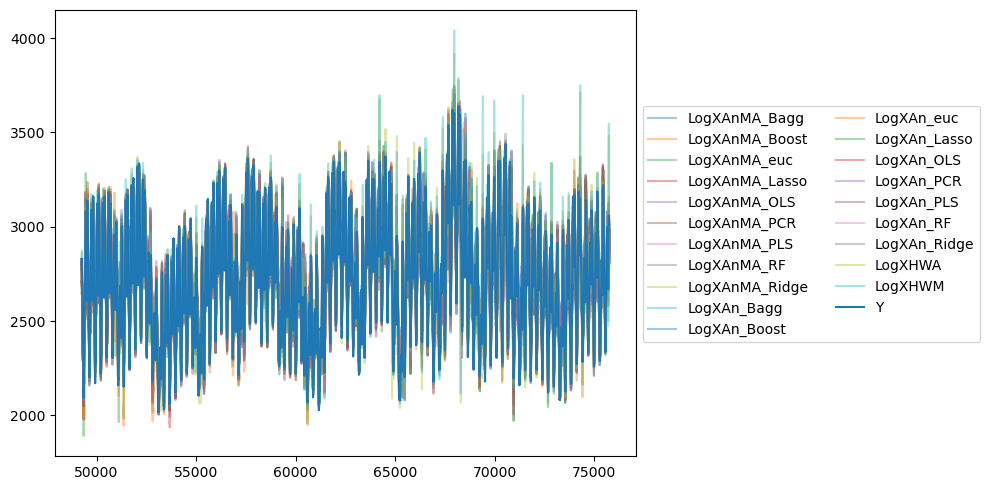

In [10]:
plt.figure(figsize=(10, 5))
for k in dict_df.keys():
    if 'X' in k:
        plt.plot(dict_df[k].y_pred, label=k, alpha = 0.4)

# plt.plot(df_serie4_per['index'], df_serie4_per.SERIE4, label='Persistence') FAIL!
plt.plot(df_serie4_sel['index'], df_serie4_sel.SERIE4, label='Y')

plt.legend(bbox_to_anchor=(1, 0.8), ncol = 2)
plt.tight_layout()
plt.show()

In [11]:
if False:
    plt.figure()
    for k in dict_df.keys():
        if 'X' not in k:
            plt.plot(dict_df[k].y_pred, label=k, alpha = 0.4)

    plt.plot(df_serie4_sel['index'], df_serie4_sel.SERIE4, label='Y')

    plt.legend(bbox_to_anchor=(1, 0.8), ncol=2)
    plt.tight_layout()
    plt.show()

In [12]:
d_maes = []
df_serie4x_sel = df_serie4.iloc[49247:75767]
for k in dict_df.keys():
    if 'X' in k:
        mae_p  = mean_absolute_error(dict_df[k].y_pred, df_serie4x_sel.SERIE4)
        mape_p = mean_absolute_percentage_error(dict_df[k].y_pred, df_serie4x_sel.SERIE4)*100
    else:
        mae_p  = mean_absolute_error(dict_df[k].y_pred, df_serie4_sel.SERIE4)
        mape_p = mean_absolute_percentage_error(dict_df[k].y_pred, df_serie4_sel.SERIE4)*100
    d_maes.append({
        'mae' : mae_p,
        'mape' : mape_p,
        't' : dict_df[k].t_pred.mean(),
        't_std' : dict_df[k].t_pred.std(),
        'method' : k
    })
df_maes = pd.DataFrame(d_maes)
df_maes


,mae,mape,t,t_std,method
0,12.572421,0.469341,1.594884,3.931365e-02,LogAnMA_Bagg
1,12.138571,0.453520,1.529895,2.439601e-02,LogAnMA_Boost
2,8.892793,0.328530,1.822360,3.686495e-02,LogAnMA_euc
3,7.834958,0.289199,1.533478,7.683243e-02,LogAnMA_Lasso
4,8.187475,0.302723,1.498857,4.346000e-02,LogAnMA_OLS
5,6.805507,0.251168,1.602229,3.935577e-02,LogAnMA_PCR
6,31.562509,1.163763,1.567004,7.215081e-02,LogAnMA_PLS
7,10.450524,0.390211,1.613881,2.918061e-02,LogAnMA_RF
8,7.838007,0.289311,1.618417,4.160390e-02,LogAnMA_Ridge
9,23.285393,0.862310,1.591555,3.913848e-02,LogAn_Bagg


In [13]:
df_maes_x = df_maes[df_maes.method.str.contains('X')]
df_maes_not_x = df_maes[~df_maes.method.str.contains('X')]

C:\Users\user\AppData\Local\Temp\ipykernel_18676\322787778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maes_not_x.sort_values('mape', inplace = True)


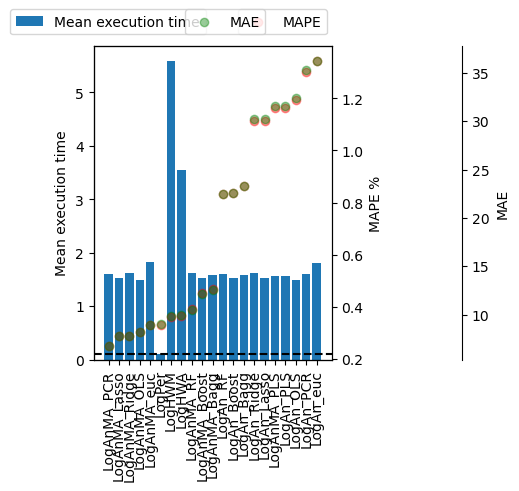

In [14]:
df_maes_not_x.sort_values('mape', inplace = True)
plt.figure(figsize=(7,5)) #
plt.bar(df_maes_not_x.method, df_maes_not_x.t, label='Mean execution time')
plt.xticks(rotation = 90)
plt.ylabel('Mean execution time')
plt.axhline(y = df_maes_not_x.t.min(), color = 'black', linestyle = '--')
plt.legend(bbox_to_anchor = (0.5, 1.14), fontsize = 10, ncols = 2)
plt.tight_layout()

ax = plt.gca()
ax2 = ax.twinx()
plt.scatter(df_maes_not_x.method, df_maes_not_x.mape, marker = 'o', color = '#ff0000', label = 'MAPE',alpha=0.4)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 10)
plt.ylabel('MAPE %')
ax2.yaxis.label.set_color('#000000')
ax2.tick_params(axis='y', colors='#000000')

ax3 = ax.twinx()
plt.scatter(df_maes_not_x.method, df_maes_not_x.mae, marker = 'o', color = 'green', label = 'MAE',alpha=0.4)
plt.legend(bbox_to_anchor = (0.75, 1.14), fontsize = 10, ncols = 1)
plt.ylabel('MAE')
ax3.spines.right.set_position(("data", 34))
ax3.yaxis.label.set_color('#000000')
ax3.tick_params(axis='y', colors='#000000')

plt.tight_layout()
namefile = dir+'fig:mape_vs_time.pdf'
plt.savefig(namefile, transparent=True)

plt.show()

In [16]:
df_maes_not_x.method

5       LogAnMA_PCR
3     LogAnMA_Lasso
8     LogAnMA_Ridge
4       LogAnMA_OLS
2       LogAnMA_euc
40           LogPer
19           LogHWM
18           LogHWA
7        LogAnMA_RF
1     LogAnMA_Boost
0      LogAnMA_Bagg
16         LogAn_RF
10      LogAn_Boost
9        LogAn_Bagg
17      LogAn_Ridge
12      LogAn_Lasso
6       LogAnMA_PLS
15        LogAn_PLS
13        LogAn_OLS
14        LogAn_PCR
11        LogAn_euc
Name: method, dtype: object

C:\Users\user\AppData\Local\Temp\ipykernel_18676\2913970784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maes_x.sort_values('mape', inplace = True)


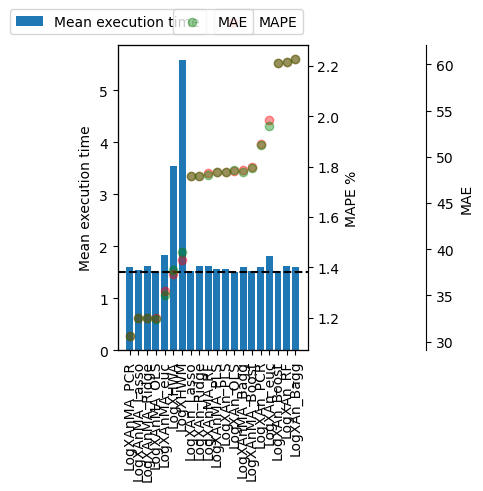

In [18]:
df_maes_x.sort_values('mape', inplace = True)
plt.figure(figsize=(7,5)) #
plt.bar(df_maes_x.method, df_maes_x.t, label='Mean execution time')
plt.xticks(rotation = 90)
plt.ylabel('Mean execution time')
plt.axhline(y = df_maes_x.t.min(), color = 'black', linestyle = '--')
plt.legend(bbox_to_anchor = (0.5, 1.14), fontsize = 10, ncols = 2)
plt.tight_layout()

ax = plt.gca()
ax2 = ax.twinx()
plt.scatter(df_maes_x.method, df_maes_x.mape, marker = 'o', color = '#ff0000', label = 'MAPE',alpha=0.4)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 10)
plt.ylabel('MAPE %')
ax2.yaxis.label.set_color('#000000')
ax2.tick_params(axis='y', colors='#000000')

ax3 = ax.twinx()
plt.scatter(df_maes_x.method, df_maes_x.mae, marker = 'o', color = 'green', label = 'MAE',alpha=0.4)
plt.legend(bbox_to_anchor = (0.75, 1.14), fontsize = 10, ncols = 1)
plt.ylabel('MAE')
ax3.spines.right.set_position(("data", 34))
ax3.yaxis.label.set_color('#000000')
ax3.tick_params(axis='y', colors='#000000')

plt.tight_layout()
namefile = dir+'fig:mape_vs_timeX.pdf'
plt.savefig(namefile, transparent=True)


plt.show()

In [16]:
# df_maes_x.sort_values('mape', inplace = True)
# plt.figure()
# plt.bar(df_maes_x.method, df_maes_x.t, label='Mean execution time')
# plt.xticks(rotation = 90)
# plt.ylabel('Mean execution time')
# plt.axhline(y = df_maes_x.t.min(), color = 'black', label='Minimun time', linestyle = '--')
# plt.legend(bbox_to_anchor = (0.78, 1.14), fontsize = 12, ncols = 2)
# plt.tight_layout()

# ax = plt.gca()
# ax2 = ax.twinx()
# plt.scatter(df_maes_x.method, df_maes_x.mape, marker = 'o', color = '#ff0000', label = 'MAPE')
# plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
# plt.ylabel('MAPE')

# plt.tight_layout()

# namefile = dir+'fig:mape_vs_timeX.pdf'
# plt.savefig(namefile, transparent=True)
# plt.show()

In [19]:
d_errors = []
df_serie4x_sel = df_serie4.iloc[49247:75767]
for k in dict_df.keys():
    if 'X' in k:
        ts_e = df_serie4x_sel.reset_index().SERIE4 - dict_df[k].reset_index().y_pred

    else:
        ts_e = df_serie4_sel.reset_index().SERIE4 - dict_df[k].reset_index().y_pred
    d_errors.append(pd.Series(ts_e))
df_errors = pd.DataFrame(d_errors)
df_errors = df_errors.T
df_errors.columns = dict_df.keys()
df_errors

,LogAnMA_Bagg,LogAnMA_Boost,LogAnMA_euc,LogAnMA_Lasso,LogAnMA_OLS,LogAnMA_PCR,LogAnMA_PLS,LogAnMA_RF,LogAnMA_Ridge,LogAn_Bagg,...,LogXAn_euc,LogXAn_Lasso,LogXAn_OLS,LogXAn_PCR,LogXAn_PLS,LogXAn_RF,LogXAn_Ridge,LogXHWA,LogXHWM,LogPer
0,9.122671,6.701088,117.235658,33.147039,27.244910,53.004237,39.971634,7.942703,33.136926,9.122671,...,117.235658,33.147039,27.244910,53.004237,39.971634,7.942703,33.136926,6.863250,6.258107,0.350977
1,4.371787,5.722389,104.610874,27.886024,22.749623,45.076210,34.232847,5.370229,27.876920,4.371787,...,128.567220,29.912032,23.826402,51.175235,37.155870,9.258982,29.902267,3.812146,3.419191,2.149170
2,0.171821,1.297880,107.561885,16.362710,13.752328,33.737479,23.471539,0.584206,16.350397,0.171821,...,115.893345,19.962534,15.604506,45.157037,28.883280,7.001590,19.948911,-1.497518,-1.637755,-3.090283
3,1.438887,3.777199,105.284159,16.887037,15.247765,32.286965,24.117997,3.057632,16.876004,1.438887,...,118.541387,21.520780,17.576944,49.404947,31.776658,9.820750,21.507520,-3.223619,-4.341923,2.245166
4,2.771636,4.428266,110.637385,18.940140,18.387118,32.505634,26.219575,2.249337,18.922106,2.771636,...,127.316566,24.640399,21.332298,55.507064,36.356429,10.675926,24.627879,-8.440354,-11.451938,0.855176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-39.998237,-93.326798,-91.592492,-94.333273,-91.407459,-119.203896,-93.325192,-38.943204,-21.365222,NaN
26516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-39.239454,-83.893697,-81.796760,-85.851868,-81.766677,-70.141235,-83.891894,-35.204576,-15.959001,NaN
26517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-34.576117,-86.392156,-84.477004,-87.799335,-84.340069,-65.364461,-86.390525,-37.731260,-16.879391,NaN
26518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-39.397667,-90.792750,-88.881168,-91.329968,-88.551593,-56.656838,-90.791065,-40.859540,-18.630979,NaN


Prueba estadística a partir de los valores absolutos de los errores.

In [73]:
# Se usa para comparar datos ordenados y por pares
alpha = 0.05
friedman_res = stats.friedmanchisquare(df_errors.dropna().abs().LogAnMA_PCR, df_errors.dropna().abs().LogPer, df_errors.dropna().abs().LogHWM, df_errors.dropna().abs().LogHWA)
print(friedman_res)
if (friedman_res.pvalue < alpha):
    print('grupos son diferentes')
else:
    print('grupos son distintos')

FriedmanchisquareResult(statistic=6626.0071105072275, pvalue=0.0)
grupos son diferentes


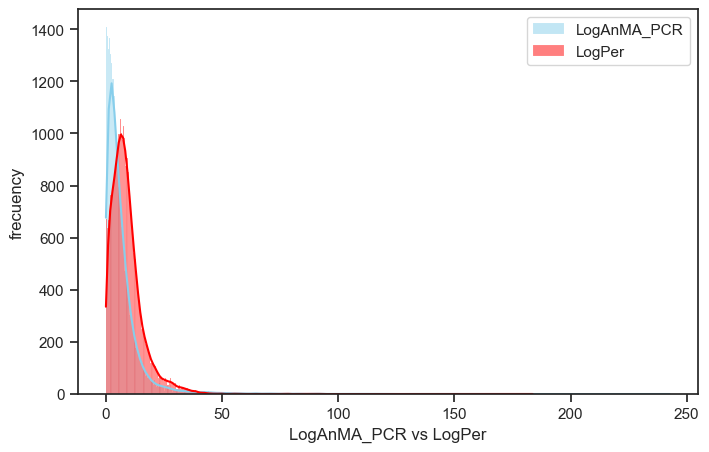

LogAnMA_PCR LogPer
WilcoxonResult(statistic=100106168.0, pvalue=0.0)
less distribution
###########



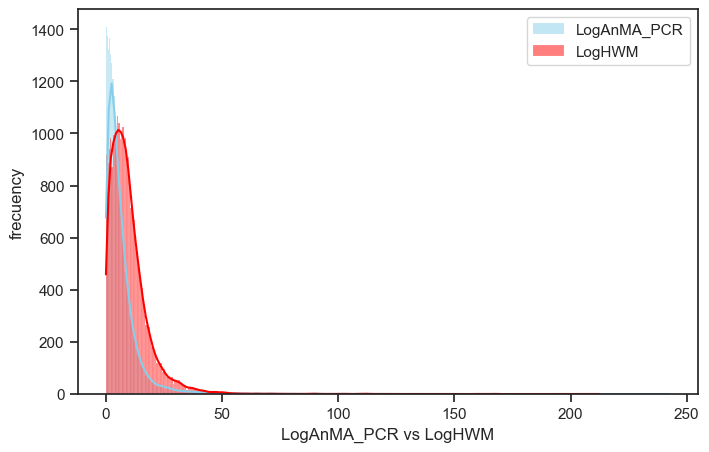

LogAnMA_PCR LogHWM
WilcoxonResult(statistic=95752847.0, pvalue=0.0)
less distribution
###########



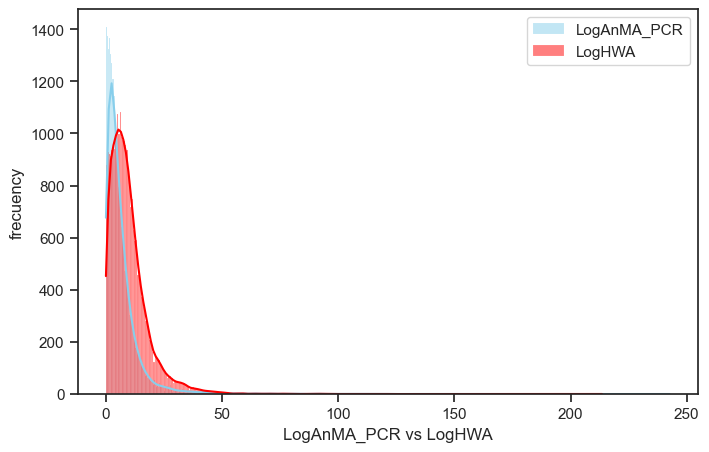

LogAnMA_PCR LogHWA
WilcoxonResult(statistic=94794076.0, pvalue=0.0)
less distribution
###########



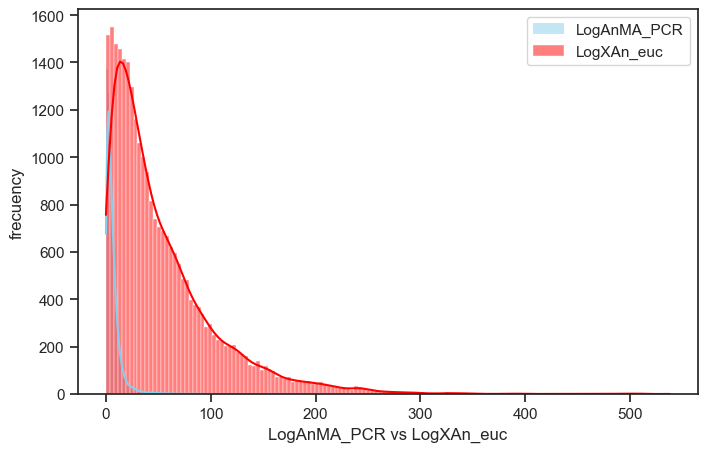

LogAnMA_PCR LogXAn_euc
WilcoxonResult(statistic=8748955.0, pvalue=0.0)
less distribution
###########



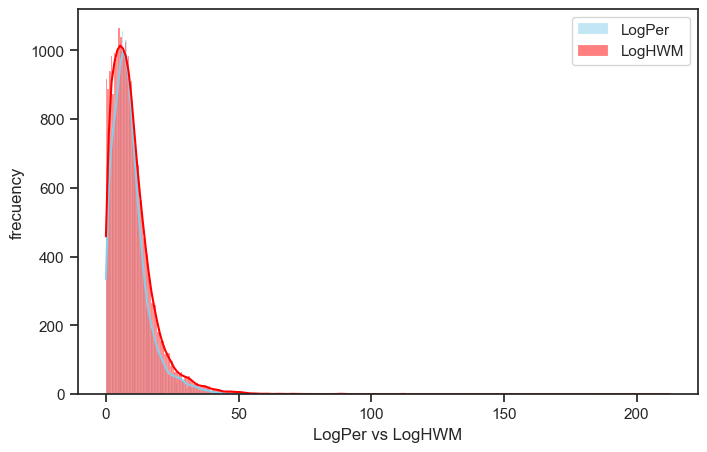

LogPer LogHWM
WilcoxonResult(statistic=150178634.0, pvalue=2.3056661540469366e-92)
less distribution
###########



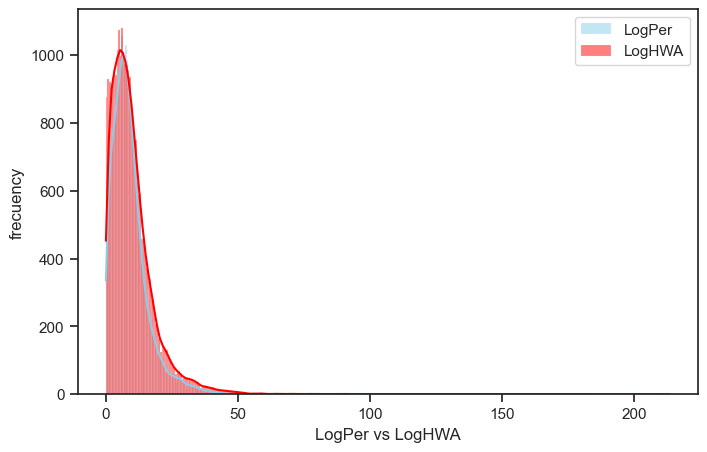

LogPer LogHWA
WilcoxonResult(statistic=146595488.0, pvalue=1.1812686184427639e-119)
less distribution
###########



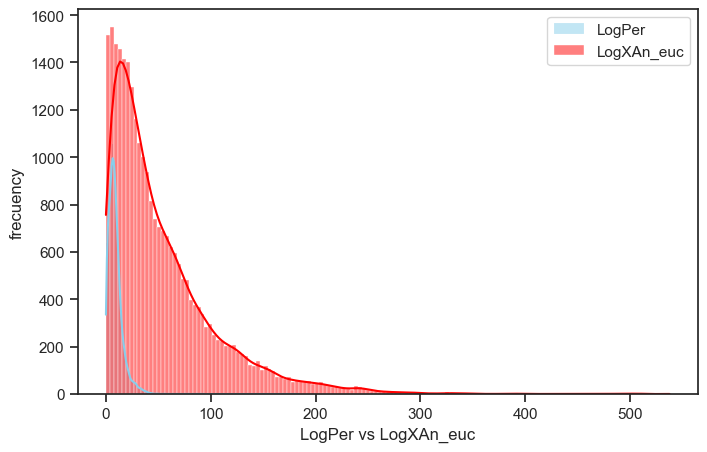

LogPer LogXAn_euc
WilcoxonResult(statistic=15135901.0, pvalue=0.0)
less distribution
###########



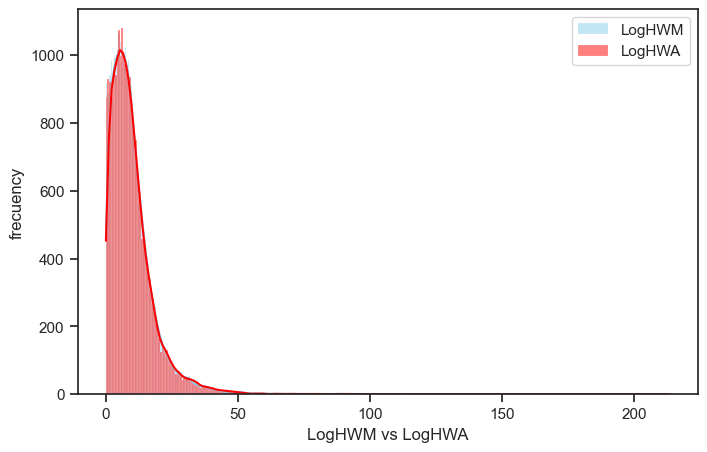

LogHWM LogHWA
WilcoxonResult(statistic=160862899.0, pvalue=2.817971155816861e-32)
less distribution
###########



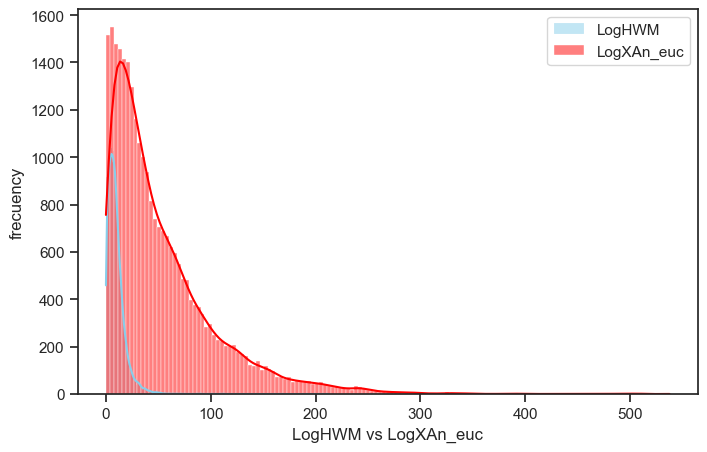

LogHWM LogXAn_euc
WilcoxonResult(statistic=17877233.0, pvalue=0.0)
less distribution
###########



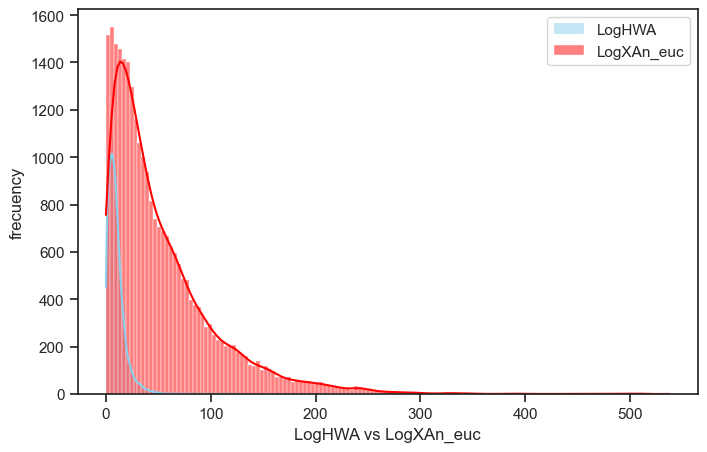

LogHWA LogXAn_euc
WilcoxonResult(statistic=18243076.0, pvalue=0.0)
less distribution
###########



In [75]:
contentands = [
    'LogAnMA_PCR',
    'LogPer',
    'LogHWM',
    'LogHWA',
    'LogXAn_euc'
]

alternative = 'less'

for c1 in range(len(contentands)):
    for c2 in range(c1 + 1, len(contentands)):
        if c1 != c2:
            sns.set(style="ticks") 
            plt.figure(figsize=(8, 5))
            ax = plt.gca()
            sns.histplot(data=df_errors.dropna().abs(), x=contentands[c1], color="skyblue", label=contentands[c1],   kde=True, ax=ax)
            sns.histplot(data=df_errors.dropna().abs(), x=contentands[c2], color="red",     label=contentands[c2], kde=True, ax=ax)
            ax.set_xlabel(f'{contentands[c1]} vs {contentands[c2]}')
            ax.set_ylabel('frecuency')
            plt.legend()
            #axs[0, 0].get_yaxis().set_visible(False)
            plt.show()
            print(contentands[c1], contentands[c2])
            wil_res = stats.wilcoxon(df_errors.dropna().abs()[contentands[c1]], df_errors.dropna().abs()[contentands[c2]], alternative=alternative)
            print(wil_res)
            if (wil_res.pvalue < alpha):
                print(f'{alternative} distribution')
            else:
                print(f'{alternative} rejected')
        print('###########\n')

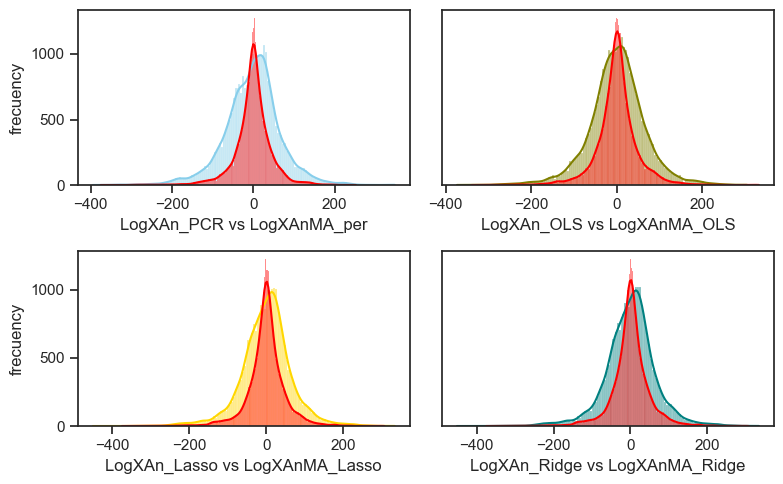

In [52]:

sns.set(style="ticks") 
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.histplot(data=df_errors, x="LogXAn_PCR",    color="skyblue", label="LogXAn_PCR",   kde=True, ax=axs[0, 0])
sns.histplot(data=df_errors, x="LogXAnMA_PCR",  color="red",     label="LogXAnMA_PCR", kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('LogXAn_PCR vs LogXAnMA_PCR')
axs[0, 0].set_ylabel('frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="LogXAn_OLS",    color="olive",   label="LogXAn_OLS",    kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors, x="LogXAnMA_OLS",  color="red",     label="LogXAnMA_OLS",  kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('LogXAn_OLS vs LogXAnMA_OLS')
axs[0, 1].set_ylabel('frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="LogXAn_Lasso",  color="gold",    label="LogXAn_Lasso",  kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors, x="LogXAnMA_Lasso",color="red",     label="LogXAnMA_Lasso",kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('LogXAn_Lasso vs LogXAnMA_Lasso')

axs[1, 0].set_ylabel('frecuency')
#axs[1, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="LogXAn_Ridge",  color="teal",    label="LogXAn_Ridge",  kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors, x="LogXAnMA_Ridge",color="red",     label="LogXAnMA_Ridge",kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('LogXAn_Ridge vs LogXAnMA_Ridge')
axs[1, 1].set_ylabel('frecuency')
axs[1, 1].get_yaxis().set_visible(False)

plt.tight_layout()
namefile = dir+'fig:multipleX.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

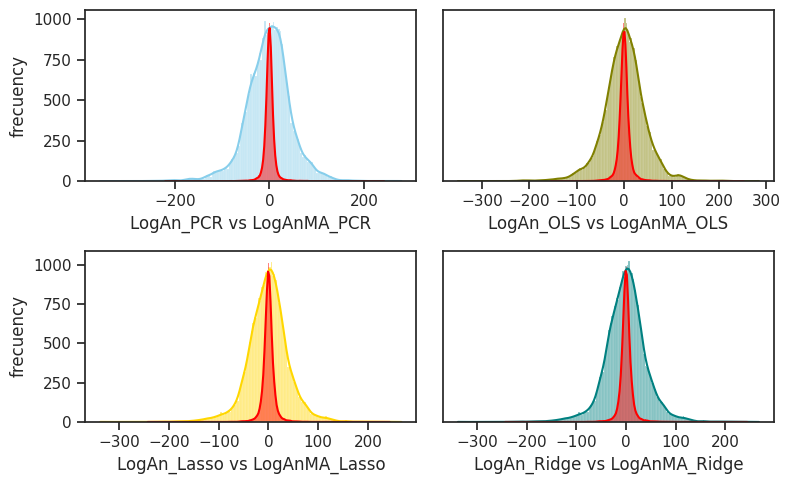

In [19]:
sns.set(style="ticks")
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.histplot(data=df_errors, x="LogAn_PCR",    color="skyblue", label="LogAn_PCR",   kde=True, ax=axs[0, 0])
sns.histplot(data=df_errors, x="LogAnMA_PCR",  color="red",     label="LogAnMA_PCR", kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('LogAn_PCR vs LogAnMA_PCR')
axs[0, 0].set_ylabel('frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="LogAn_OLS",    color="olive",   label="LogAn_OLS",    kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors, x="LogAnMA_OLS",  color="red",     label="LogAnMA_OLS",  kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('LogAn_OLS vs LogAnMA_OLS')
axs[0, 1].set_ylabel('frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="LogAn_Lasso",  color="gold",    label="LogAn_Lasso",  kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors, x="LogAnMA_Lasso",color="red",     label="LogAnMA_Lasso",kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('LogAn_Lasso vs LogAnMA_Lasso')

axs[1, 0].set_ylabel('frecuency')
#axs[1, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="LogAn_Ridge",  color="teal",    label="LogAn_Ridge",  kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors, x="LogAnMA_Ridge",color="red",     label="LogAnMA_Ridge",kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('LogAn_Ridge vs LogAnMA_Ridge')
axs[1, 1].set_ylabel('frecuency')
axs[1, 1].get_yaxis().set_visible(False)

plt.tight_layout()
namefile = dir+'fig:multiple.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

In [20]:
df_errors_x = df_errors[[c for c in df_errors.columns if 'X' in c]]
df_errors_not_x = df_errors[[c for c in df_errors.columns if 'X' not in c]]

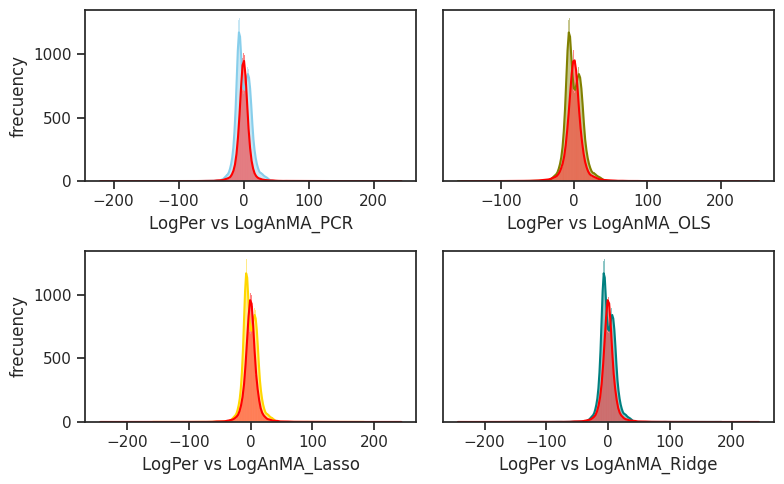

In [21]:
sns.set(style="ticks")
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.histplot(data=df_errors, x="LogPer",    color="skyblue", label="LogPer",   kde=True, ax=axs[0, 0])
sns.histplot(data=df_errors, x="LogAnMA_PCR",  color="red",     label="LogAnMA_PCR", kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('LogPer vs LogAnMA_PCR')
axs[0, 0].set_ylabel('frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="LogPer",    color="olive",   label="LogPer",    kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors, x="LogAnMA_OLS",  color="red",     label="LogAnMA_OLS",  kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('LogPer vs LogAnMA_OLS')
axs[0, 1].set_ylabel('frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="LogPer",  color="gold",    label="LogPer",  kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors, x="LogAnMA_Lasso",color="red",     label="LogAnMA_Lasso",kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('LogPer vs LogAnMA_Lasso')

axs[1, 0].set_ylabel('frecuency')
#axs[1, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="LogPer",  color="teal",    label="LogPer",  kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors, x="LogAnMA_Ridge",color="red",     label="LogAnMA_Ridge",kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('LogPer vs LogAnMA_Ridge')
axs[1, 1].set_ylabel('frecuency')
axs[1, 1].get_yaxis().set_visible(False)

plt.tight_layout()
namefile = dir+'fig:multiplePER.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

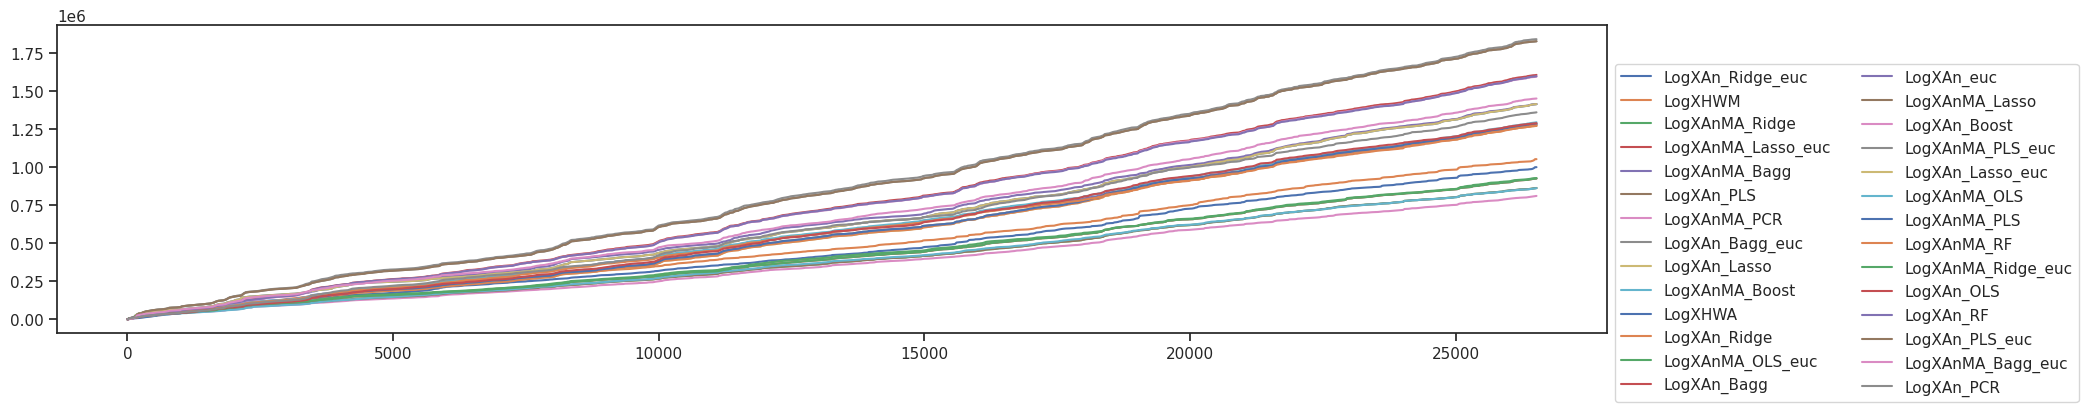

In [22]:
plt.figure(figsize=(20, 4))
for c in df_errors_x.columns:
    plt.plot(df_errors_x[c].abs().cumsum(), label = c)

plt.legend(bbox_to_anchor=(1, 0.9), ncol = 2)
plt.show()

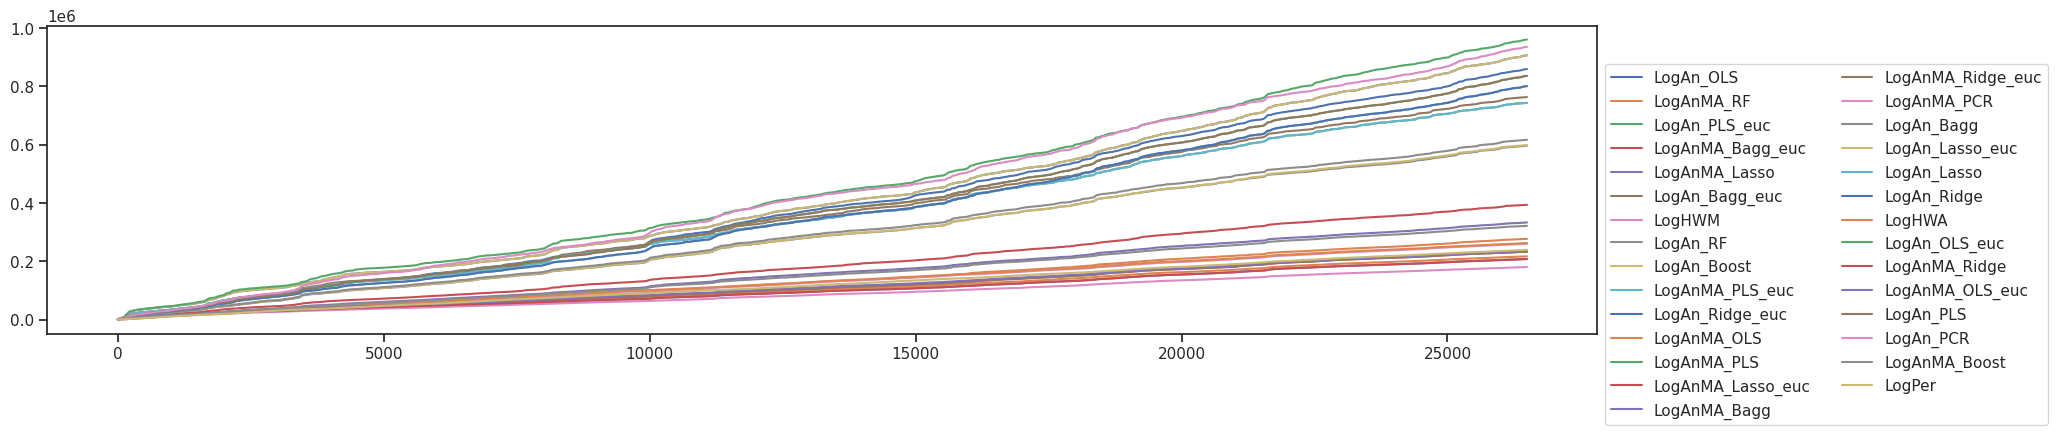

In [23]:
plt.figure(figsize=(20, 4))
for c in df_errors_not_x.columns:
    plt.plot(df_errors_not_x[c].abs().cumsum(), label = c)

plt.legend(bbox_to_anchor=(1, 0.9), ncol = 2)
plt.show()

In [24]:
df_errors_x_samp = df_errors_x.sample(frac=0.01)
# https://stackoverflow.com/a/46134162
df_errors_x_melt = df_errors_x_samp.melt(var_name='models', value_name='vals')
df_errors_x_melt.loc

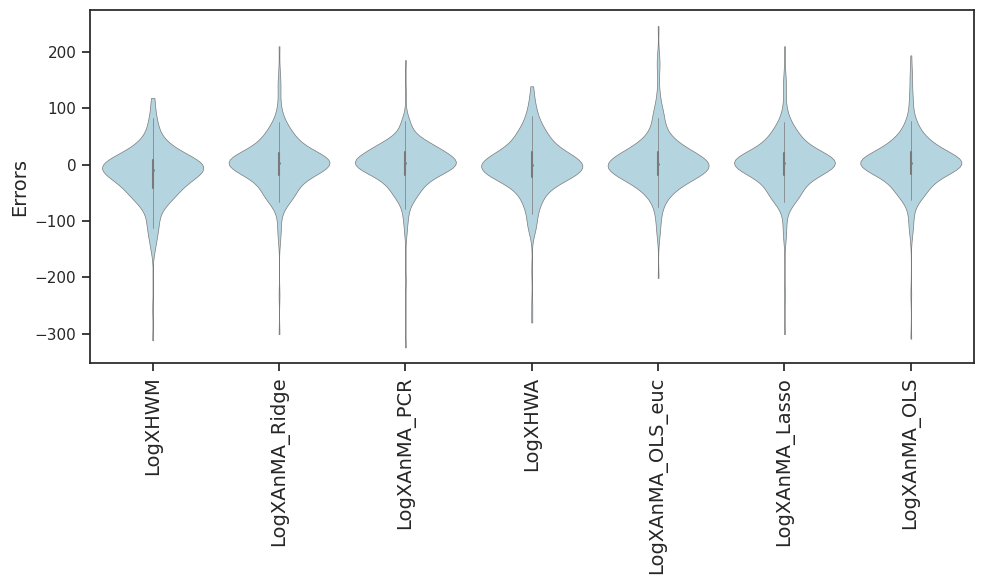

In [25]:
# [ ] Gráfica a partir de muestreo de datos
# [ ] Línea de tiempos
# [ ] Ordenar por menor MAE
plt.figure(figsize=(10, 6))
data=df_errors_x_melt.loc[  (df_errors_x_melt['models']=='LogXAnMA_PCR'    )  |
                            (df_errors_x_melt['models']=='LogXAnMA_Lasso'  )  |
                            (df_errors_x_melt['models']=='LogXAnMA_Ridge'  )  |
                            (df_errors_x_melt['models']=='LogXAnMA_OLS'    )  |
                            (df_errors_x_melt['models']=='LogXAnMA_OLS_euc')  |
                            (df_errors_x_melt['models']=='LogXHWA'         )  | 
                            (df_errors_x_melt['models']=='LogXHWM'         )  ]
                                                                     
data.sort_values(by=['vals'], ascending=False)
sns.violinplot(x="models", y="vals", data=data, cut=0, scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('Errors', fontsize = 14)
plt.xlabel('')
patch = mpatches.Patch(color='lightblue', label='Errors (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
#plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)
plt.tight_layout()
namefile = dir+'fig:violinsX.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

In [26]:
df_errors_not_x_samp = df_errors_not_x.sample(frac=0.01)
# https://stackoverflow.com/a/46134162
df_errors_not_x_melt = df_errors_not_x_samp.melt(var_name='models', value_name='vals')
df_errors_not_x_melt

,models,vals
0,LogAn_OLS,-19.170308
1,LogAn_OLS,20.686540
2,LogAn_OLS,-29.524770
3,LogAn_OLS,1.694125
4,LogAn_OLS,-24.221429
...,...,...
7680,LogPer,10.593604
7681,LogPer,-6.811865
7682,LogPer,-20.350293
7683,LogPer,-7.398047


In [27]:
type(data)

pandas.core.frame.DataFrame

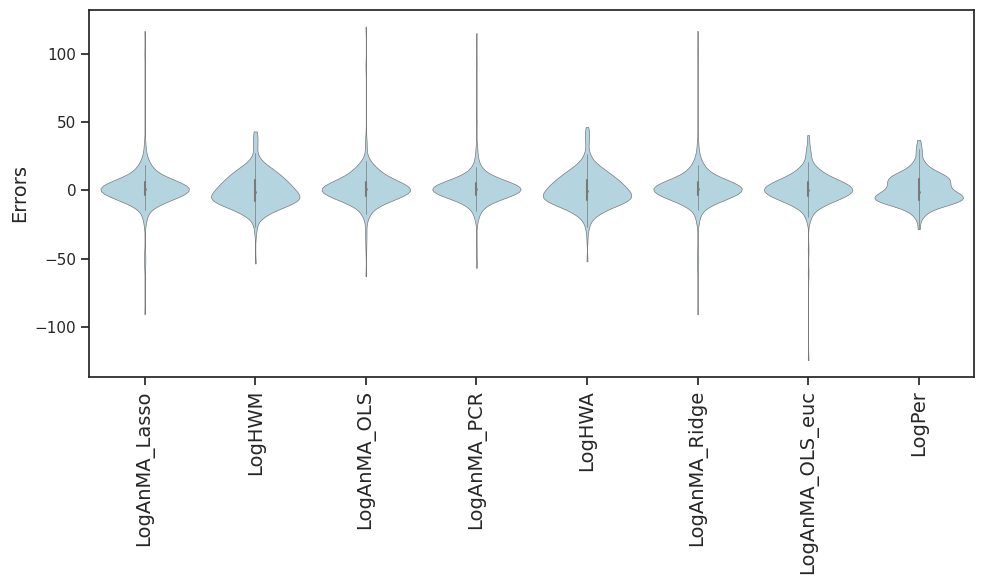

In [28]:
# [ ] Gráfica a partir de muestreo de datos
# [ ] Línea de tiempos
# [ ] Ordenar por menor MAE
plt.figure(figsize=(10, 6))
data=df_errors_not_x_melt.loc[  (df_errors_not_x_melt['models']=='LogAnMA_PCR'    )  |
                                (df_errors_not_x_melt['models']=='LogAnMA_Lasso'  )  |
                                (df_errors_not_x_melt['models']=='LogAnMA_Ridge'  )  |
                                (df_errors_not_x_melt['models']=='LogAnMA_OLS'    )  |
                                (df_errors_not_x_melt['models']=='LogAnMA_OLS_euc')  |
                                (df_errors_not_x_melt['models']=='LogPer'         )  |
                                (df_errors_not_x_melt['models']=='LogHWA'         )  | 
                                (df_errors_not_x_melt['models']=='LogHWM'         )  ]
                                                                     
data.sort_values(by=['vals'], ascending=False)

sns.violinplot(x="models", y="vals", data=data, cut=0, scale = 'width', linewidth = 0.5, color = 'lightblue')

plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('Errors', fontsize = 14)
plt.xlabel('')
patch = mpatches.Patch(color='lightblue', label='Errors (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
#plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)
plt.tight_layout()
namefile = dir+'fig:violins.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

## Inference test

In [29]:
from scipy.stats import shapiro
import scipy.stats as stats

In [30]:
def means_test(alternative, labels, samples,alpha=0.05):
## Ho(Accepted): The difference between the pairs follows a symmetric distribution around zero.
## Ha(Rejected): The difference between the pairs does not follow a symmetric distribution around zero.
## We conduct the Mann-whitney U or two-sample t test alternative= {'two-sided', 'greater', 'less'} 
# ==============================================================================
## Tipo de prueba
    
	Ho   = labels[0]+'-'+labels[1]+': means the samples is of the same distribution.'
	decision1   = 'We fail to reject the Ho; Ho accepted:'
	if alternative == 'less':
		message1='\t: We fail to reject the null hypothesis; Ho accepted: \n\tThe difference between the pairs follows a symmetric distribution around zero.'
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t'+labels[0]+'\'s mean is less than '+labels[1]+'\'s mean.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: '+labels[0]+'\'s mean is less than '+labels[1]+'\'s mean.'
	if alternative == 'greater':
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t'+labels[0]+'\'s mean is greater than '+labels[1]+'\'s mean.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: '+labels[0]+'\'s mean is greater than '+labels[1]+'\'s mean.'
	if alternative == 'two-sided':
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t The mean difference between the pairs not follows a symmetric distribution around zero.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.'

	## Checamos normalidad 
	normal=[]
	for s in samples:
		if shapiro(s).pvalue > alpha:
			normal.append(True)
		else:
			# print(labels[i],'\t:',round(shapiro(s).statistic,4),'\t',round(shapiro(s).pvalue,4),'\tWe reject the null hypothesis and accept Ha: Sample is not from the normal distributions.')
			normal.append(False)

	## Checamos homocedasticidad
	levene_test = stats.levene(samples[0], samples[1], center='mean')
	equalvar=False
	if levene_test.pvalue > alpha:
		equalvar =True
	#   print('[Harjk,Harduc]\t:',round(levene_test.statistic,4),round(levene_test.pvalue,4),'\tWe fail to reject the null hypothesis; Ho accepted: the variances are equal across all samples. (Po>0.05)')
	# else:
	#   print(labels[0],labels[1],'\t:',round(levene_test.statistic,4),round(levene_test.pvalue,4),'\tWe reject the Ho and accept Ha: the variances are not equal across all samples. (Po<=0.05)')
	test = ''
	if normal[0]==True and normal[1]==True and equalvar==True: ## T-test two samples
		test = 'T-test for two samples'
		# print(labels[0],labels[1],stats.ttest_ind(samples[0], samples[1], alternative=alternative) )
		if stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue > alpha:
			# print('\t',message1)
			print(Ho,',',test,',', round(stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision1)
		else:
			# print('\t',message2)
			print(Ho,',',test,',', round(stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision2)
	else: ## Mann-whitney U Test
		test = 'Mann-whitney'
		# print(labels[0],labels[1],stats.mannwhitneyu(samples[0], samples[1], alternative=alternative) )
		if stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue > alpha:
			# print('\t',message1)
			print(Ho,',',test,',', round(stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision1)
		else:
			# print('\t',message2)
			print(Ho,',',test,',', round(stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision2)
	  
## Kruskal-Wallis test discussion:  In this example, the test statistic comes out to be equal to 87 and the corresponding p-value is 2.1856E-17. 
## (As the p-value is not less than 0.05, we cannot reject the null hypothesis that the median of optimality gap is the same for all groups. 
## Hence, We don’t have sufficient proof to claim that the different types of methods used to lead to statistically significant differences in the acuracy of methods.)
## (As the p-value is less than 0.05, we reject the null hypothesis that the median of optimality gap is the same for all groups. 
## Hence, We don’t have sufficient proof to reject that the different types of methods used to lead to statistically significant differences in the acuracy of methods.)

In [31]:
def varianze_test_levene(labels,samples,alpha=0.05):
## Ho(Accepted): We fail to reject the null hypothesis; Ho accepted: the variances are equal between samples.
## Ha(Rejected): We reject the Ho and accept Ha: the variances are not equal between samples.
## We conduct the Levene test
# ==============================================================================
    
	Ho   = labels[0]+'-'+labels[1]+':the variances are equal between samples'
	decision1   = 'We fail to reject the Ho; Ho accepted'
	decision2   = 'We reject the Ho and accept Ha: the variances are not equal between samples'
	test='Levene'
	## Checamos homocedasticidad
	levene_test = stats.levene(samples[0], samples[1], center='mean')
	equalvar=False

	if levene_test.pvalue > alpha:
		equalvar = True
		print(Ho,',',test,',', round(stats.levene(samples[0],samples[1], center='mean').pvalue,4),',',decision1)
	else:
		print(Ho,',',test,',', round(stats.levene(samples[0],samples[1], center='mean').pvalue,4),',',decision2)

In [32]:
df_maes_x.iloc[:7].method.to_list()

['LogXAnMA_PCR',
 'LogXAnMA_Lasso',
 'LogXAnMA_Ridge',
 'LogXAnMA_OLS',
 'LogXAnMA_Lasso_euc',
 'LogXAnMA_Ridge_euc',
 'LogXAnMA_OLS_euc']

In [33]:
df_errors_x_best = df_errors_x[df_maes_x.iloc[:7].method.to_list()]


In [34]:
#df_errors_x_best['LogXHWM'].abs().values

In [35]:
samples = [list(df_errors_x_best[c].abs().values) for c in df_errors_x_best.columns]
labels = df_errors_x_best.columns
means  = []

print('\n RANKING==============================================================================\n')
i = 0
ordered_labels  = []
ordered_samples = []
for s in samples:
  means.append((i,np.mean(s)))
  i = i + 1
means.sort(key=lambda tup: tup[1], reverse=False) ##reverse=False

for m in means:  
  ordered_samples.append(samples[m[0]])
  ordered_labels.append(labels[m[0]])
  print(labels[m[0]],m[1])

print('\n Ha:less,alpha=0.05=====================================================================\n')
print('Means difference hypothesis test summary')
print('Null hypothesis,Test,Significance,Decision')
for i in range(len(ordered_labels)):
	for j in range(len(ordered_labels)):
		if j > i:
			means_test('two-sided',(ordered_labels[i],ordered_labels[j]),(ordered_samples[i],ordered_samples[j]),alpha=0.05)

print('\n Ha:less,alpha=0.05=====================================================================\n')
print('varianze difference hypothesis test summary')
print('Null hypothesis,Test,Significance,Decision')
for i in range(len(ordered_labels)):
	for j in range(len(ordered_labels)):
		if j > i:
			varianze_test_levene((ordered_labels[i],ordered_labels[j]),(ordered_samples[i],ordered_samples[j]),alpha=0.05)



 RANKING==============================================================================

LogXAnMA_PCR 30.573666762977847
LogXAnMA_OLS 32.50196527724006
LogXAnMA_Lasso 32.53929887527497
LogXAnMA_Ridge 32.546958454715615
LogXAnMA_Lasso_euc 34.89341258421487
LogXAnMA_Ridge_euc 34.89943271097779
LogXAnMA_OLS_euc 35.00923060556211

 Ha:less,alpha=0.05=====================================================================

Means difference hypothesis test summary
Null hypothesis,Test,Significance,Decision
LogXAnMA_PCR-LogXAnMA_OLS: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
LogXAnMA_PCR-LogXAnMA_Lasso: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
LogXAnMA_PCR-LogXAnMA_Ridge: The means difference of the samples fr

/home/uriel/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


LogXAnMA_PCR-LogXAnMA_Lasso_euc: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
LogXAnMA_PCR-LogXAnMA_Ridge_euc: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
LogXAnMA_PCR-LogXAnMA_OLS_euc: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
LogXAnMA_OLS-LogXAnMA_Lasso: The means difference of the samples from the same distribution. , Mann-whitney , 0.4866 , We fail to reject the Ho; Ho accepted:
LogXAnMA_OLS-LogXAnMA_Ridge: The means difference of the samples from the same distribution. , Mann-whitney , 0.5025 , We fail to reject the Ho; Ho accepted:
LogXAnMA_OLS-LogXAnMA_Lass